## 运行版本

In [1]:
import sys

sys.version

'3.8.13 (default, Mar 28 2022, 06:59:08) [MSC v.1916 64 bit (AMD64)]'

In [2]:
import tensorflow

tensorflow.__version__

'2.6.0'

In [3]:
import torch

torch.__version__

'1.10.1'

In [4]:
# !python -m deepxde.backend.set_default_backend pytorch

In [5]:
import deepxde

deepxde.__version__

Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term



'1.1.3'

# 1 输运方程(Transport equation)

下面记 $u = u(x,t), x=(x_1,\cdots,x_n) \in \mathbb{R}^n, t \geq 0$ ，$x$ 是空间中的一个点，$t$ 是时间。$Du = D_x u = (u_{x_1},\cdots,u_{x_n})$是代表 $u$ 关于空间变量 $x$ 的梯度。$u_t$ 代表 $u$ 关于时间的偏导数。

**定义1.1** 偏微分方程
$$
\large u_t + b \cdot D_u = 0,(x,t) \in \mathbb{R}^n \times (0,\infty)    \tag{1}
$$
是**输运方程(transport equation)**，这里 $b=(b_1,\cdots,b_n) \in \mathbb{R}^n$ 是个固定的向量。

为了解这个PDE，我们现在就不妨设 $u$ 有某个光滑的解然后再尝试计算它。首先注意到方程(1)表明 $u$ 的某个特定方向的导数为0, 我们固定任意的点 $(x,t) \in \mathbb{R}^n \times (0,\infty)$ 并定义 $\large z(s) \triangleq u(x+sb,t+s) s \in \mathbb{R}$，

以下都记 $\frac {d} {ds} = \dot{} $，利用方程(1)计算得到 $\large \dot z(s) = Du(x+sb,t+s) · b + u_t(x+sb,t+s) = 0$。

因此 $z(·{})$ 是关于 $s$ 的常函数，所以对每个点 $(x,t)$，$u$ 在穿过 $(x,t)$ 且方向是 $(b,1) \in \mathbb{R}^{n+1}$ 的直线(记为 $l$ )上是个常数。因此，如果我们知道了直线 $l$ 上任意一个点的 $u$ 值，我们就知道了这条直线 $l$ 的值。

## 1.1 初值问题

为了确定所需要的解, 考虑如下初值问题
$$
\large
\begin{cases}
\begin{aligned}
u_t+b· D_u &= 0, in \ \mathbb{R}^n \times (0,\infty) \\ 
u &= g, on \ \mathbb{R}^n \times \{t=0\}.  \\ 
\end{aligned}
\end{cases} 
\tag{2}
$$
这里 $b \in \mathbb{R}^n,g:\mathbb{R}^n \to \mathbb{R}$ 给定, 现在要求出 $u$ 的表达式。

固定了上述 $(x,t)$，穿过 $(x,t)$ 且方向为 $(b,1)$ 的直线可以用参数方程 $(x+sb,t+s) (s \in \mathbb{R})$ 表示，当 $s=-t$ 时，这条直线打在平面$\Gamma := \mathbb{R}^n \times \{t=0\}$ 上，且交点是 $(x-tb,0)$。由于 $u$ 是直线上的常数，且 $u(x-tb,0)=g(x-tb)$，因此
$$
\large u(x,t) = g(x-tb),x \in \mathbb{R}^n,t \geq 0.\tag{3}
$$
因此如果方程(2)有足够好的解 $u$，则这个解一定形如(3)。另一方面，容易判断如果$g \in C^1$，则式(3)满足方程(2)。

**注:** 如果 $g \not \in C^1$，显然方程(2)没有解 $C^1$，则这个解叫做“**弱解**”。不过有时候不光滑甚至是不连续的函数都可以作为PDE的一个弱解。

## 1.2 非齐次初值问题

下面考虑非齐次方程
$$
\large
\begin{cases}
\begin{aligned}
u_t+b · D_u &= f, in \ \mathbb{R}^n \times (0,\infty) \\ 
u &= g, on \ \mathbb{R}^n \times \{t=0\}.  \\ 
\end{aligned}
\end{cases}
\tag{4}
$$
受前面过程启发，我们与前面类似，固定 $(x,t) \in \mathbb{R}^{n+1}$，记 $\large z(s) \triangleq u(x+sb,t+s) s \in \mathbb{R}$，则$\large \dot z(s) = Du(x+sb,t+s) · b + u_t(x+sb,t+s) = f(x+sb,t+s)$。

因此
$$
\large
\begin{align*}
u(x,t) - g(x-tb) &= z(0) - z(-t) = \int^0_{-t} \dot{z}(s) ds \\
&= \int^0_{-t} f(x+sb,t+s) ds   \\ 
&= \int^t_{0} f(x+(s-t)b,s) ds,   \\
\end{align*}
$$
因此 $\large u(x,t) = g(x-tb) + \int^t_{0} f(x+(s-t)b,s) ds, x\in \mathbb{R}^n,t \geq 0$是初值问题(4)的解。这个方程可以被用来解一维的波动方程。

**注：**注意到我们实际上是通过有效地把PDE转变成ODE最终得到PDE的解，这些步骤是“**特性曲线法**”的一种特例。

## 问题设置
下面考虑非齐次方程
$$
\large
\begin{cases}
\begin{aligned}
u_t+2 · D_u &= x, in \ \mathbb{R}^1 \times (0,\infty) \\ 
u &= x^2, on \ \mathbb{R}^1 \times \{t=0\}.  \\ 
\end{aligned}
\end{cases}
$$

当我们用DeepXDE求解上式时，应该改写为
$$\large u_t+2 · u_x = x, x \in [−1,1], t \in [0,1]$$

初始条件 $\large u(x,0) = x^2, $ 


使用mathematica来求解

```mathematica
sol = DSolve[{D[u[t, x], t] + 2*D[u[t, x], x] == x, u[0, x] == x^2}, 
   u[t, x], {t, x}];
TraditionalForm[u[t, x] /. sol[[1]]]
```

得到的答案为：$\large u(x,t) = 3t^2-3tx+x^2$ 。

### 参考代码：
https://deepxde.readthedocs.io/en/latest/demos/pinn_forward/burgers.html

### 执行

本描述逐步介绍了上述transport equation的求解器的实现。

首先，导入 DeepXDE 和 TensorFlow ( `tf`) 模块：

In [2]:
import deepxde as dde
from deepxde.backend import tf

Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term




我们首先定义一个计算几何和时域。我们可以使用内置类`Interval`，并且我们使用以下方式`TimeDomain`组合两个域`GeometryXTime`

In [3]:
geom = dde.geometry.Interval(-1, 1)
timedomain = dde.geometry.TimeDomain(0, 0.99)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

接下来，我们表达 transport 方程的 PDE 残差：

$\large u_t+2 · u_x = x, x \in [−1,1], t \in [0,1]$

In [4]:
def pde(x, y):
    dy_x = dde.grad.jacobian(y, x, i=0, j=0)
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    return dy_t + 2 * dy_x - x

接下来，我们考虑边界/初始条件。

In [5]:
ic = dde.icbc.IC(geomtime, lambda x: -np.sin(np.pi * x[:, 0:1]), lambda _, on_initial: on_initial)

现在，我们已经指定了几何、PDE 残差和边界/初始条件。然后我们将`TimePDE`问题定义为

In [6]:
data = dde.data.TimePDE(geomtime, pde, [ic],
                        num_domain=2540, num_boundary=80, num_initial=160)

G:\Anaconda3\envs\py3.8\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
G:\Anaconda3\envs\py3.8\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
G:\Anaconda3\envs\py3.8\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "


数字 2540 是在域内采样的训练残差点数，数字 80 是在边界上采样的训练点数。我们还包括初始条件的 160 个初始残差点。

接下来，我们选择网络。在这里，我们使用深度为 4（即 3 个隐藏层）和宽度为 20 的全连接神经网络：

In [7]:
net = dde.nn.FNN([2] + [20] * 3 + [1], "tanh", "Glorot normal")

现在，我们有 PDE 问题和网络。我们构建一个`Model`并选择优化器和学习率：

In [8]:
model = dde.Model(data, net)
model.compile("adam", lr=1e-3)

Compiling model...
Building feed-forward neural network...
'build' took 0.060587 s



G:\Anaconda3\envs\py3.8\lib\site-packages\keras\legacy_tf_layers\core.py:236: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
G:\Anaconda3\envs\py3.8\lib\site-packages\keras\engine\base_layer_v1.py:1676: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


'compile' took 1.334987 s



然后我们训练模型进行 10000 次迭代：

In [9]:
losshistory, train_state = model.train(epochs=10000)

Initializing variables...
Training model...

Step      Train loss              Test loss               Test metric
0         [5.61e-01, 6.59e-01]    [5.61e-01, 6.59e-01]    []  
1000      [1.67e-01, 9.25e-03]    [1.67e-01, 9.25e-03]    []  
2000      [1.66e-01, 4.02e-04]    [1.66e-01, 4.02e-04]    []  
3000      [1.66e-01, 3.68e-05]    [1.66e-01, 3.68e-05]    []  
4000      [1.66e-01, 1.85e-05]    [1.66e-01, 1.85e-05]    []  
5000      [1.66e-01, 4.29e-06]    [1.66e-01, 4.29e-06]    []  
6000      [1.66e-01, 1.71e-06]    [1.66e-01, 1.71e-06]    []  
7000      [1.66e-01, 9.44e-06]    [1.66e-01, 9.44e-06]    []  
8000      [1.66e-01, 1.59e-06]    [1.66e-01, 1.59e-06]    []  
9000      [1.66e-01, 2.64e-06]    [1.66e-01, 2.64e-06]    []  
10000     [1.66e-01, 3.08e-07]    [1.66e-01, 3.08e-07]    []  

Best model at step 10000:
  train loss: 1.66e-01
  test loss: 1.66e-01
  test metric: []

'train' took 18.607478 s



在我们使用 Adam 训练网络之后，我们继续使用 L-BFGS 训练网络以实现更小的损失：

In [11]:
model.compile("L-BFGS-B")
losshistory, train_state = model.train()

Compiling model...
'compile' took 0.117822 s

Training model...

Step      Train loss              Test loss               Test metric
10019     [1.66e-01, 3.08e-07]    [1.66e-01, 3.08e-07]    []  
INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  Objective function value: 0.165597
  Number of iterations: 1
  Number of functions evaluations: 22
10041     [1.66e-01, 3.08e-07]    [1.66e-01, 3.08e-07]    []  

Best model at step 10000:
  train loss: 1.66e-01
  test loss: 1.66e-01
  test metric: []

'train' took 0.300388 s



saveplot

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


def plot_loss_history(loss_history, figsize=(10, 8)):
    """Plot the training and testing loss history.

    Note:
        You need to call ``plt.show()`` to show the figure.

    Args:
        loss_history: ``LossHistory`` instance. The first variable returned from
            ``Model.train()``.
    """
    loss_train = np.sum(loss_history.loss_train, axis=1)
    loss_test = np.sum(loss_history.loss_test, axis=1)

    plt.figure(figsize=figsize)
    plt.semilogy(loss_history.steps, loss_train, label="Train loss")
    plt.semilogy(loss_history.steps, loss_test, label="Test loss")
    for i in range(len(loss_history.metrics_test[0])):
        plt.semilogy(
            loss_history.steps,
            np.array(loss_history.metrics_test)[:, i],
            label="Test metric",
        )
    plt.xlabel("Steps")
    plt.ylabel("loss")
    plt.legend()
    plt.show()
    

def _pack_data(train_state):
    def merge_values(values):
        if values is None:
            return None
        return np.hstack(values) if isinstance(values, (list, tuple)) else values

    y_train = merge_values(train_state.y_train)
    y_test = merge_values(train_state.y_test)
    best_y = merge_values(train_state.best_y)
    best_ystd = merge_values(train_state.best_ystd)
    return y_train, y_test, best_y, best_ystd

def plot_best_state(train_state, figsize=(10, 6)):
    """Plot the best result of the smallest training loss.

    This function only works for 1D and 2D problems. For other problems and to better
    customize the figure, use ``save_best_state()``.

    Note:
        You need to call ``plt.show()`` to show the figure.

    Args:
        train_state: ``TrainState`` instance. The second variable returned from
            ``Model.train()``.
    """
    if isinstance(train_state.X_train, (list, tuple)):
        print(
            "Error: The network has multiple inputs, and plotting such result han't been implemented."
        )
        return

    y_train, y_test, best_y, best_ystd = _pack_data(train_state)
    y_dim = best_y.shape[1]

    # Regression plot
    # 1D
    if train_state.X_test.shape[1] == 1:
        idx = np.argsort(train_state.X_test[:, 0])
        X = train_state.X_test[idx, 0]
        plt.figure(figsize=figsize)
        for i in range(y_dim):
            if y_train is not None:
                plt.plot(train_state.X_train[:, 0], y_train[:, i], "ok", label="Train")
            if y_test is not None:
                plt.plot(X, y_test[idx, i], "-k", label="True")
            plt.plot(X, best_y[idx, i], "--r", label="Prediction")
            if best_ystd is not None:
                plt.plot(
                    X, best_y[idx, i] + 2 * best_ystd[idx, i], "-b", label="95% CI"
                )
                plt.plot(X, best_y[idx, i] - 2 * best_ystd[idx, i], "-b")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
    # 2D
    elif train_state.X_test.shape[1] == 2:
        for i in range(y_dim):
            plt.figure(figsize=tuple([i*2 for i in figsize]))
            ax = plt.axes(projection=Axes3D.name)
            ax.plot3D(
                train_state.X_test[:, 0],
                train_state.X_test[:, 1],
                best_y[:, i],
                ".",
            )
            ax.set_xlabel("$x_1$")
            ax.set_ylabel("$x_2$")
            ax.set_zlabel("$y_{}$".format(i + 1))

    plt.show()

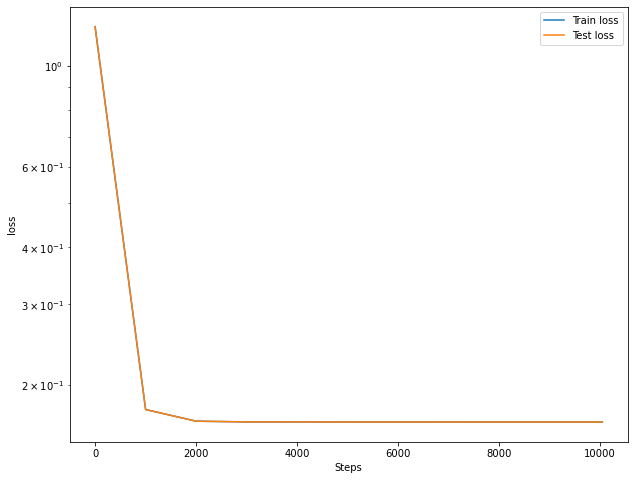

In [12]:
plot_loss_history(losshistory)

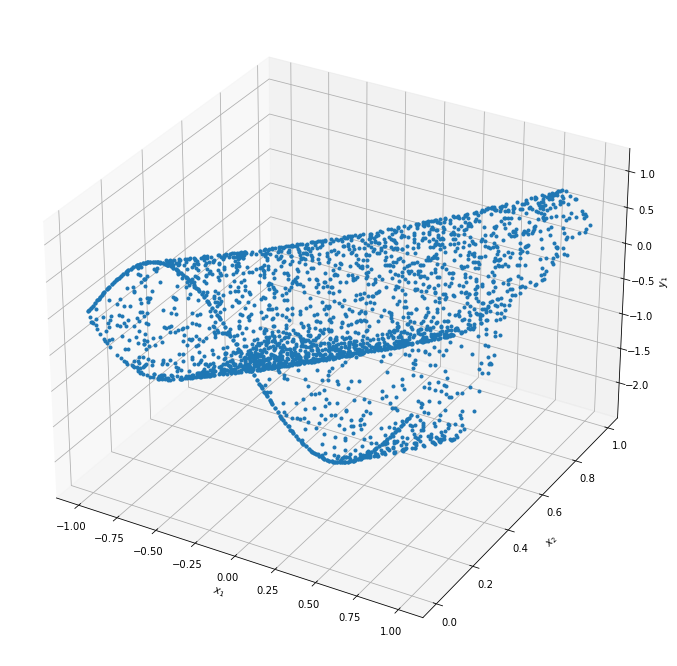

In [13]:
plot_best_state(train_state)